# **Problem 1**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# reshape data
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

# split 70/30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

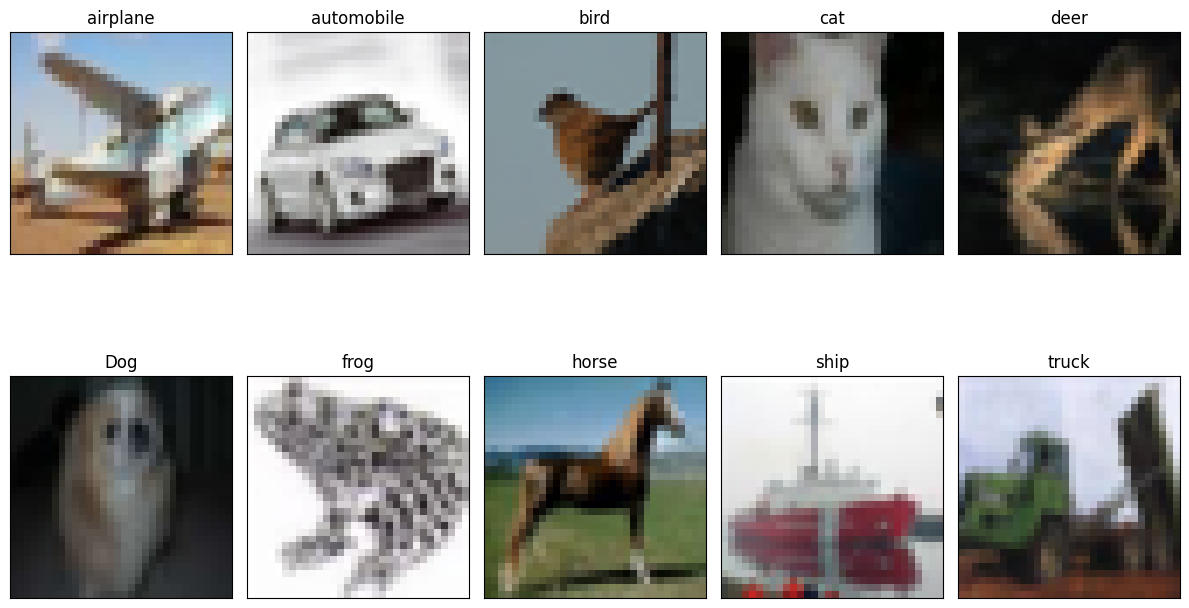

In [2]:
# Class names for labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'Dog', 'frog', 'horse', 'ship', 'truck']

# Get the number of unique classes
num_classes = len(class_names)

# Create a figure with subplots to show one image per class
plt.figure(figsize=(12, 8))

# Loop through each class
for i in range(num_classes):
    # Find the first image with the current label
    idx = np.where(y_train == i)[0][0]
    image = X_train[idx]

    # Create subplot
    plt.subplot(2, 5, i + 1) # 2 rows and 5 columns of plots
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(class_names[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [3]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [4]:
print(X_train[8])

[[[173 199  97]
  [181 195 126]
  [201 212 157]
  ...
  [205 212 148]
  [184 191 128]
  [174 193  92]]

 [[168 188 103]
  [169 185 177]
  [183 195 195]
  ...
  [224 227 231]
  [196 196 210]
  [180 186 131]]

 [[170 192 110]
  [163 182 169]
  [149 173 143]
  ...
  [223 226 226]
  [181 188 190]
  [158 169 108]]

 ...

 [[146 182  59]
  [120 179  70]
  [121 179  77]
  ...
  [119 176  87]
  [114 173  86]
  [133 175  62]]

 [[145 179  56]
  [121 170  68]
  [137 183 100]
  ...
  [120 180  75]
  [129 180  95]
  [139 178  57]]

 [[160 191  82]
  [145 179  49]
  [158 186  70]
  ...
  [147 184  48]
  [153 184  54]
  [152 187  63]]]


In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
print(X_train[8])

[[[0.67843137 0.78039216 0.38039216]
  [0.70980392 0.76470588 0.49411765]
  [0.78823529 0.83137255 0.61568627]
  ...
  [0.80392157 0.83137255 0.58039216]
  [0.72156863 0.74901961 0.50196078]
  [0.68235294 0.75686275 0.36078431]]

 [[0.65882353 0.7372549  0.40392157]
  [0.6627451  0.7254902  0.69411765]
  [0.71764706 0.76470588 0.76470588]
  ...
  [0.87843137 0.89019608 0.90588235]
  [0.76862745 0.76862745 0.82352941]
  [0.70588235 0.72941176 0.51372549]]

 [[0.66666667 0.75294118 0.43137255]
  [0.63921569 0.71372549 0.6627451 ]
  [0.58431373 0.67843137 0.56078431]
  ...
  [0.8745098  0.88627451 0.88627451]
  [0.70980392 0.7372549  0.74509804]
  [0.61960784 0.6627451  0.42352941]]

 ...

 [[0.57254902 0.71372549 0.23137255]
  [0.47058824 0.70196078 0.2745098 ]
  [0.4745098  0.70196078 0.30196078]
  ...
  [0.46666667 0.69019608 0.34117647]
  [0.44705882 0.67843137 0.3372549 ]
  [0.52156863 0.68627451 0.24313725]]

 [[0.56862745 0.70196078 0.21960784]
  [0.4745098  0.66666667 0.26666667]


In [7]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
from tensorflow.keras.utils import to_categorical

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))


# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# add nerual network layers
def model():
  model = Sequential()

  #input layer
  model.add(Dense(128, input_dim=3072, activation='relu'))

  #first hidden layer
  model.add(Dense(128, activation='relu'))

  #second hidden layer
  model.add(Dense(64, activation='relu'))

  #final layer
  model.add(Dense(10, activation='softmax')) #needs 10 final neurons because this is a multi-classification model

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [8]:
!pip install scikeras
!pip install scikit-learn==1.3.0

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but y

In [9]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

classifier = KerasClassifier(build_fn=model)

param_grid = {'batch_size': [128, 256, 512], 'epochs': [25, 50, 100]}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring = 'neg_mean_absolute_error', cv=3)

In [10]:
history = grid_search.fit(X_train, y_train, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.2298 - loss: 2.0785 - val_accuracy: 0.3305 - val_loss: 1.8491
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.3461 - loss: 1.8138 - val_accuracy: 0.3621 - val_loss: 1.7801
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3897 - loss: 1.7082 - val_accuracy: 0.4128 - val_loss: 1.6507
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4050 - loss: 1.6507 - val_accuracy: 0.4221 - val_loss: 1.6216
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4305 - loss: 1.5931 - val_accuracy: 0.4271 - val_loss: 1.6160
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4459 - loss: 1.5588 - val_accuracy: 0.4239 - val_loss: 1.5994
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4536 - loss: 1.5184 - val_accuracy: 0.4456 - val_loss: 1.5648
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4572 - loss: 1.5101 - val_acc

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.2374 - loss: 2.0796 - val_accuracy: 0.3464 - val_loss: 1.8301
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3590 - loss: 1.7872 - val_accuracy: 0.3688 - val_loss: 1.7642
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.3995 - loss: 1.6922 - val_accuracy: 0.4052 - val_loss: 1.6656
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4128 - loss: 1.6351 - val_accuracy: 0.4241 - val_loss: 1.6372
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4320 - loss: 1.5935 - val_accuracy: 0.4160 - val_loss: 1.6215
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4493 - loss: 1.5453 - val_accuracy: 0.4402 - val_loss: 1.5738
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4560 - loss: 1.5231 - val_accuracy: 0.4297 - val_loss: 1.6128
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.4629 - loss: 1.4963 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2350 - loss: 2.0770 - val_accuracy: 0.3376 - val_loss: 1.8268
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3620 - loss: 1.7909 - val_accuracy: 0.3754 - val_loss: 1.7494
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3943 - loss: 1.6976 - val_accuracy: 0.4014 - val_loss: 1.6761
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4096 - loss: 1.6451 - val_accuracy: 0.4083 - val_loss: 1.6499
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4263 - loss: 1.5969 - val_accuracy: 0.4182 - val_loss: 1.6154
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4478 - loss: 1.5569 - val_accuracy: 0.4296 - val_loss: 1.6026
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4615 - loss: 1.5132 - val_accuracy: 0.4413 - val_loss: 1.5545
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4730 - loss: 1.4944 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2238 - loss: 2.0993 - val_accuracy: 0.3281 - val_loss: 1.8658
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3565 - loss: 1.7892 - val_accuracy: 0.3786 - val_loss: 1.7392
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3930 - loss: 1.7019 - val_accuracy: 0.3983 - val_loss: 1.6708
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4215 - loss: 1.6337 - val_accuracy: 0.4030 - val_loss: 1.6581
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4266 - loss: 1.6010 - val_accuracy: 0.4303 - val_loss: 1.6066
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4409 - loss: 1.5445 - val_accuracy: 0.4403 - val_loss: 1.5732
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4549 - loss: 1.5203 - val_accuracy: 0.4358 - val_loss: 1.5866
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4655 - loss: 1.5038 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2436 - loss: 2.0586 - val_accuracy: 0.3450 - val_loss: 1.8149
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.3534 - loss: 1.7928 - val_accuracy: 0.3835 - val_loss: 1.7126
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3751 - loss: 1.7242 - val_accuracy: 0.3855 - val_loss: 1.7021
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4165 - loss: 1.6381 - val_accuracy: 0.3892 - val_loss: 1.6920
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4223 - loss: 1.6179 - val_accuracy: 0.4177 - val_loss: 1.6181
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4388 - loss: 1.5714 - val_accuracy: 0.4135 - val_loss: 1.6422
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4459 - loss: 1.5424 - val_accuracy: 0.4378 - val_loss: 1.5733
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4613 - loss: 1.5127 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2297 - loss: 2.0859 - val_accuracy: 0.3553 - val_loss: 1.8089
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3659 - loss: 1.7652 - val_accuracy: 0.3667 - val_loss: 1.7694
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3884 - loss: 1.7057 - val_accuracy: 0.3957 - val_loss: 1.6792
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4145 - loss: 1.6381 - val_accuracy: 0.4095 - val_loss: 1.6609
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4334 - loss: 1.6016 - val_accuracy: 0.4166 - val_loss: 1.6307
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4479 - loss: 1.5521 - val_accuracy: 0.4267 - val_loss: 1.6111
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4554 - loss: 1.5364 - val_accuracy: 0.4391 - val_loss: 1.5661
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4637 - loss: 1.4987 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2479 - loss: 2.0553 - val_accuracy: 0.3447 - val_loss: 1.8166
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3542 - loss: 1.7944 - val_accuracy: 0.3764 - val_loss: 1.7379
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3961 - loss: 1.6805 - val_accuracy: 0.3911 - val_loss: 1.6865
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4135 - loss: 1.6370 - val_accuracy: 0.4312 - val_loss: 1.5994
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4341 - loss: 1.5917 - val_accuracy: 0.4174 - val_loss: 1.6219
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4428 - loss: 1.5455 - val_accuracy: 0.4304 - val_loss: 1.5901
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4542 - loss: 1.5231 - val_accuracy: 0.4396 - val_loss: 1.5538
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4591 - loss: 1.4979 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2246 - loss: 2.1033 - val_accuracy: 0.3373 - val_loss: 1.8558
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3677 - loss: 1.7767 - val_accuracy: 0.3851 - val_loss: 1.7023
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3951 - loss: 1.6936 - val_accuracy: 0.4003 - val_loss: 1.6854
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4191 - loss: 1.6285 - val_accuracy: 0.4159 - val_loss: 1.6254
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4340 - loss: 1.5870 - val_accuracy: 0.4239 - val_loss: 1.6108
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4495 - loss: 1.5371 - val_accuracy: 0.4247 - val_loss: 1.6141
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4567 - loss: 1.5238 - val_accuracy: 0.4281 - val_loss: 1.5995
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4613 - loss: 1.4974 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.2278 - loss: 2.0825 - val_accuracy: 0.3177 - val_loss: 1.8837
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3559 - loss: 1.7870 - val_accuracy: 0.3892 - val_loss: 1.7037
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3947 - loss: 1.6844 - val_accuracy: 0.4146 - val_loss: 1.6342
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4228 - loss: 1.6204 - val_accuracy: 0.3988 - val_loss: 1.6622
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4484 - loss: 1.5526 - val_accuracy: 0.4346 - val_loss: 1.5888
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.4537 - loss: 1.5295 - val_accuracy: 0.4363 - val_loss: 1.5790
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4647 - loss: 1.4954 - val_accuracy: 0.4079 - val_loss: 1.6400
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4725 - loss: 1.4805 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2154 - loss: 2.1244 - val_accuracy: 0.3306 - val_loss: 1.8556
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3454 - loss: 1.8268 - val_accuracy: 0.3632 - val_loss: 1.7762
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.3761 - loss: 1.7409 - val_accuracy: 0.3727 - val_loss: 1.7384
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4013 - loss: 1.6856 - val_accuracy: 0.3814 - val_loss: 1.7062
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4118 - loss: 1.6370 - val_accuracy: 0.4214 - val_loss: 1.6322
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4238 - loss: 1.6140 - val_accuracy: 0.4332 - val_loss: 1.6007
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4392 - loss: 1.5664 - val_accuracy: 0.4293 - val_loss: 1.6017
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4531 - loss: 1.5334 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2081 - loss: 2.1399 - val_accuracy: 0.3441 - val_loss: 1.8488
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3495 - loss: 1.8258 - val_accuracy: 0.3698 - val_loss: 1.7554
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3802 - loss: 1.7251 - val_accuracy: 0.3988 - val_loss: 1.6913
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4056 - loss: 1.6545 - val_accuracy: 0.4154 - val_loss: 1.6354
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4262 - loss: 1.6167 - val_accuracy: 0.4217 - val_loss: 1.6289
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4369 - loss: 1.5746 - val_accuracy: 0.4414 - val_loss: 1.5689
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4429 - loss: 1.5568 - val_accuracy: 0.4157 - val_loss: 1.6230
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4494 - loss: 1.5301 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2356 - loss: 2.0613 - val_accuracy: 0.3527 - val_loss: 1.8162
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3583 - loss: 1.8047 - val_accuracy: 0.3748 - val_loss: 1.7427
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3811 - loss: 1.7337 - val_accuracy: 0.3781 - val_loss: 1.7333
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4045 - loss: 1.6775 - val_accuracy: 0.4024 - val_loss: 1.6657
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4306 - loss: 1.6098 - val_accuracy: 0.4093 - val_loss: 1.6789
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.4410 - loss: 1.5855 - val_accuracy: 0.4321 - val_loss: 1.6103
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4463 - loss: 1.5567 - val_accuracy: 0.4299 - val_loss: 1.6018
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4587 - loss: 1.5154 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.2118 - loss: 2.1220 - val_accuracy: 0.3354 - val_loss: 1.8430
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3478 - loss: 1.8177 - val_accuracy: 0.3478 - val_loss: 1.8167
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3760 - loss: 1.7423 - val_accuracy: 0.3816 - val_loss: 1.7184
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3959 - loss: 1.6859 - val_accuracy: 0.3909 - val_loss: 1.6913
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4162 - loss: 1.6462 - val_accuracy: 0.4029 - val_loss: 1.6873
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.4284 - loss: 1.6136 - val_accuracy: 0.4158 - val_loss: 1.6178
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4449 - loss: 1.5527 - val_accuracy: 0.4333 - val_loss: 1.5862
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4505 - loss: 1.5414 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.2307 - loss: 2.0986 - val_accuracy: 0.3122 - val_loss: 1.9034
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3424 - loss: 1.8234 - val_accuracy: 0.3728 - val_loss: 1.7468
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3823 - loss: 1.7225 - val_accuracy: 0.3774 - val_loss: 1.7357
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3963 - loss: 1.6863 - val_accuracy: 0.4000 - val_loss: 1.6664
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4273 - loss: 1.6087 - val_accuracy: 0.4254 - val_loss: 1.6047
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4420 - loss: 1.5594 - val_accuracy: 0.4188 - val_loss: 1.6061
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4481 - loss: 1.5364 - val_accuracy: 0.4271 - val_loss: 1.5878
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4532 - loss: 1.5238 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2121 - loss: 2.1459 - val_accuracy: 0.3167 - val_loss: 1.9164
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3429 - loss: 1.8435 - val_accuracy: 0.3809 - val_loss: 1.7418
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3857 - loss: 1.7320 - val_accuracy: 0.3786 - val_loss: 1.7148
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4001 - loss: 1.6771 - val_accuracy: 0.4032 - val_loss: 1.6691
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4147 - loss: 1.6306 - val_accuracy: 0.4093 - val_loss: 1.6558
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4271 - loss: 1.6017 - val_accuracy: 0.4125 - val_loss: 1.6397
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4398 - loss: 1.5747 - val_accuracy: 0.4393 - val_loss: 1.5830
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4620 - loss: 1.5153 - val_accu

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.2082 - loss: 2.1606 - val_accuracy: 0.3233 - val_loss: 1.8734
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3411 - loss: 1.8520 - val_accuracy: 0.3471 - val_loss: 1.8035
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3638 - loss: 1.7692 - val_accuracy: 0.3756 - val_loss: 1.7228
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3929 - loss: 1.6852 - val_accuracy: 0.3875 - val_loss: 1.7172
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.4123 - loss: 1.6367 - val_accuracy: 0.4082 - val_loss: 1.6591
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4227 - loss: 1.6120 - val_accuracy: 0.4291 - val_loss: 1.6097
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4398 - loss: 1.5752 - val_accuracy: 0.4283 - val_loss: 1.5863
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4447 - loss: 1.5470 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2148 - loss: 2.1430 - val_accuracy: 0.3216 - val_loss: 1.8797
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.3446 - loss: 1.8433 - val_accuracy: 0.3639 - val_loss: 1.7820
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3719 - loss: 1.7660 - val_accuracy: 0.3876 - val_loss: 1.7218
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3981 - loss: 1.7001 - val_accuracy: 0.3744 - val_loss: 1.7693
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4108 - loss: 1.6574 - val_accuracy: 0.4111 - val_loss: 1.6389
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4250 - loss: 1.6044 - val_accuracy: 0.4230 - val_loss: 1.6170
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4443 - loss: 1.5573 - val_accuracy: 0.4045 - val_loss: 1.6633
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4535 - loss: 1.5444 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2206 - loss: 2.1268 - val_accuracy: 0.3296 - val_loss: 1.8757
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3346 - loss: 1.8641 - val_accuracy: 0.3664 - val_loss: 1.7614
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3761 - loss: 1.7387 - val_accuracy: 0.3768 - val_loss: 1.7313
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4040 - loss: 1.6774 - val_accuracy: 0.3884 - val_loss: 1.7057
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4184 - loss: 1.6473 - val_accuracy: 0.4131 - val_loss: 1.6387
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4300 - loss: 1.6066 - val_accuracy: 0.4232 - val_loss: 1.6193
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.4494 - loss: 1.5558 - val_accuracy: 0.4178 - val_loss: 1.6200
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4492 - loss: 1.5493 - 

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.1974 - loss: 2.1871 - val_accuracy: 0.2980 - val_loss: 1.9315
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3205 - loss: 1.9000 - val_accuracy: 0.3401 - val_loss: 1.8488
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.3655 - loss: 1.7960 - val_accuracy: 0.3560 - val_loss: 1.7926
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3790 - loss: 1.7455 - val_accuracy: 0.3934 - val_loss: 1.7079
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3987 - loss: 1.6868 - val_accuracy: 0.3946 - val_loss: 1.7045
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4065 - loss: 1.6667 - val_accuracy: 0.4136 - val_loss: 1.6569
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4162 - loss: 1.6322 - val_accuracy: 0.4153 - val_loss: 1.6439
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4384 - loss: 1.5827 - val_accuracy: 0.4195 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.1885 - loss: 2.1757 - val_accuracy: 0.3136 - val_loss: 1.9067
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3315 - loss: 1.8812 - val_accuracy: 0.3510 - val_loss: 1.8088
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3564 - loss: 1.7925 - val_accuracy: 0.3777 - val_loss: 1.7377
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3902 - loss: 1.7148 - val_accuracy: 0.3761 - val_loss: 1.7315
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4019 - loss: 1.6777 - val_accuracy: 0.3934 - val_loss: 1.6810
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4200 - loss: 1.6306 - val_accuracy: 0.4153 - val_loss: 1.6506
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4333 - loss: 1.5886 - val_accuracy: 0.4253 - val_loss: 1.6129
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4393 - loss: 1.5674 - val_accuracy: 0.4244 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.1875 - loss: 2.1979 - val_accuracy: 0.3067 - val_loss: 1.9402
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3267 - loss: 1.8874 - val_accuracy: 0.3412 - val_loss: 1.8267
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3642 - loss: 1.7885 - val_accuracy: 0.3828 - val_loss: 1.7487
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.3929 - loss: 1.7164 - val_accuracy: 0.3875 - val_loss: 1.7128
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4124 - loss: 1.6814 - val_accuracy: 0.4129 - val_loss: 1.6601
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4201 - loss: 1.6427 - val_accuracy: 0.4074 - val_loss: 1.6637
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4299 - loss: 1.6077 - val_accuracy: 0.4076 - val_loss: 1.6499
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.4394 - loss: 1.5866 - val_accuracy: 0.4402 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.1965 - loss: 2.1809 - val_accuracy: 0.3134 - val_loss: 1.9083
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3307 - loss: 1.8783 - val_accuracy: 0.3555 - val_loss: 1.8111
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3721 - loss: 1.7818 - val_accuracy: 0.3813 - val_loss: 1.7463
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3947 - loss: 1.7301 - val_accuracy: 0.3911 - val_loss: 1.7133
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4049 - loss: 1.6868 - val_accuracy: 0.3936 - val_loss: 1.7000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4029 - loss: 1.6679 - val_accuracy: 0.3963 - val_loss: 1.6826
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.4114 - loss: 1.6468 - val_accuracy: 0.4207 - val_loss: 1.6327
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4374 - loss: 1.5969 - val_accuracy: 0.4338 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1855 - loss: 2.1933 - val_accuracy: 0.2735 - val_loss: 1.9693
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.3194 - loss: 1.9098 - val_accuracy: 0.3347 - val_loss: 1.8390
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3508 - loss: 1.8174 - val_accuracy: 0.3644 - val_loss: 1.7874
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3828 - loss: 1.7392 - val_accuracy: 0.3787 - val_loss: 1.7282
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.3970 - loss: 1.6893 - val_accuracy: 0.4030 - val_loss: 1.6756
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4126 - loss: 1.6389 - val_accuracy: 0.3960 - val_loss: 1.7006
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4255 - loss: 1.6177 - val_accuracy: 0.4133 - val_loss: 1.6318
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.4363 - loss: 1.5745 - val_accuracy: 0.4185 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.1619 - loss: 2.2336 - val_accuracy: 0.2751 - val_loss: 1.9809
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.2984 - loss: 1.9309 - val_accuracy: 0.3259 - val_loss: 1.8666
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3542 - loss: 1.8148 - val_accuracy: 0.3603 - val_loss: 1.7950
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3700 - loss: 1.7700 - val_accuracy: 0.3583 - val_loss: 1.7853
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3840 - loss: 1.7347 - val_accuracy: 0.3852 - val_loss: 1.7221
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4053 - loss: 1.6725 - val_accuracy: 0.4023 - val_loss: 1.6782
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4193 - loss: 1.6398 - val_accuracy: 0.4079 - val_loss: 1.6695
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4215 - loss: 1.6290 - val_accuracy: 0.4105 - v

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2024 - loss: 2.1640 - val_accuracy: 0.3298 - val_loss: 1.8826
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3368 - loss: 1.8640 - val_accuracy: 0.3551 - val_loss: 1.8053
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3635 - loss: 1.7854 - val_accuracy: 0.3782 - val_loss: 1.7479
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3995 - loss: 1.7002 - val_accuracy: 0.4001 - val_loss: 1.6943
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4044 - loss: 1.6665 - val_accuracy: 0.4162 - val_loss: 1.6408
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4236 - loss: 1.6129 - val_accuracy: 0.4103 - val_loss: 1.6492
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4301 - loss: 1.5939 - val_accuracy: 0.4279 - val_loss: 1.6067
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4409 - loss: 1.5742 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.2098 - loss: 2.1515 - val_accuracy: 0.3202 - val_loss: 1.8856
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.3361 - loss: 1.8577 - val_accuracy: 0.3429 - val_loss: 1.8127
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3678 - loss: 1.7677 - val_accuracy: 0.3675 - val_loss: 1.7324
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3770 - loss: 1.7187 - val_accuracy: 0.3901 - val_loss: 1.6927
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4075 - loss: 1.6543 - val_accuracy: 0.4097 - val_loss: 1.6559
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4208 - loss: 1.6199 - val_accuracy: 0.4048 - val_loss: 1.6536
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4369 - loss: 1.5874 - val_accuracy: 0.4261 - val_loss: 1.6051
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.4435 - loss: 1.5730 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.1766 - loss: 2.2128 - val_accuracy: 0.3073 - val_loss: 1.9372
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3197 - loss: 1.8917 - val_accuracy: 0.3406 - val_loss: 1.8367
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3644 - loss: 1.7968 - val_accuracy: 0.3507 - val_loss: 1.7898
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3762 - loss: 1.7573 - val_accuracy: 0.3890 - val_loss: 1.7245
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3970 - loss: 1.6957 - val_accuracy: 0.3874 - val_loss: 1.6951
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.4111 - loss: 1.6677 - val_accuracy: 0.4053 - val_loss: 1.6666
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4246 - loss: 1.6276 - val_accuracy: 0.4132 - val_loss: 1.6381
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4415 - loss: 1.5808 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.2071 - loss: 2.1500 - val_accuracy: 0.2812 - val_loss: 1.9578
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3276 - loss: 1.8769 - val_accuracy: 0.3623 - val_loss: 1.7889
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.3798 - loss: 1.7551 - val_accuracy: 0.3427 - val_loss: 1.8379
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.3906 - loss: 1.7123 - val_accuracy: 0.3218 - val_loss: 1.9828
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3928 - loss: 1.7027 - val_accuracy: 0.3877 - val_loss: 1.7332
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4203 - loss: 1.6300 - val_accuracy: 0.4276 - val_loss: 1.6025
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4405 - loss: 1.5642 - val_accuracy: 0.4154 - val_loss: 1.6363
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4435 - loss: 1.5635 - val_accuracy: 0.3983 - v

In [23]:
# Assume you have performed GridSearchCV

# Access the best estimator
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_
print(best_params)  # Output: {'batch_size': ..., 'epochs': ...}


{'batch_size': 512, 'epochs': 50}


In [25]:
history = best_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2177 - loss: 2.1200 - val_accuracy: 0.2813 - val_loss: 1.9279
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3206 - loss: 1.8648 - val_accuracy: 0.2993 - val_loss: 1.9465
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.3651 - loss: 1.7762 - val_accuracy: 0.3744 - val_loss: 1.7493
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.3922 - loss: 1.6975 - val_accuracy: 0.3393 - val_loss: 1.8788
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4032 - loss: 1.6869 - val_accuracy: 0.3806 - val_loss: 1.7247
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4188 - loss: 1.6269 - val_accuracy: 0.4291 - val_loss: 1.6097
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4340 - loss: 1.5700 - val_accuracy: 0.3640 - val_loss: 1.8391
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4448 - loss: 1.5725 - val_accuracy: 0.4185 - v

In [27]:
# Access training loss and accuracy
training_loss = history.history_['loss']  # Use history_ instead of history
training_accuracy = history.history_['accuracy']  # Use history_ instead of history

# Access validation loss and accuracy
validation_loss = history.history_['val_loss']  # Use history_ instead of history
validation_accuracy = history.history_['val_accuracy']  # Use history_ instead of history

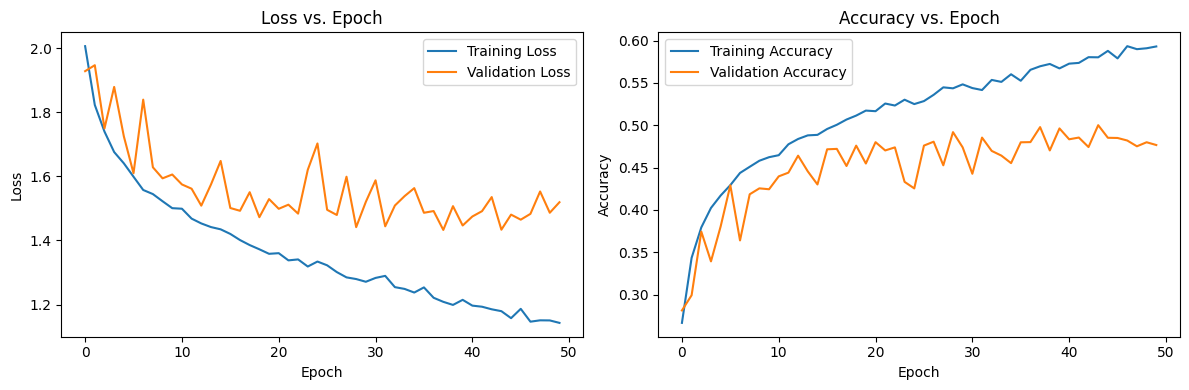

In [28]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)  # Create a subplot for accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()